## Ordinary Least Squares 

With a n x k matrix as a design matrix and an n×1 vector y as the response variable, the OLS estimator can be calculated as:

$$ \hat{\beta} = (X'X)^{-1}X'Y$$

When using OLS, there are two main assumptions to verify: 
- Little to No Multicollinearity
- Homoscedascity 

In [1]:
# This autoformats all code cells into PEP 8 when run, feel free to comment out if not wanted
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from IPython.display import display
import scipy as sp

<IPython.core.display.Javascript object>

In [3]:
# Loading in original Airbnb Data
df = pd.read_csv("../data/AB_NYC_2019.csv")
display(df)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<IPython.core.display.Javascript object>

In [4]:
# Clean data
df.dropna(subset=["last_review", "name"], axis=0, inplace=True)
df.drop(["id", "host_name"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [5]:
# Create a subset of data without categorical features
df_sub = df[
    [
        "price",
        "latitude",
        "longitude",
        "minimum_nights",
        "number_of_reviews",
        "reviews_per_month",
        "calculated_host_listings_count",
        "availability_365",
    ]
]
display(df_sub)

,price,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,40.64749,-73.97237,1,9,0.21,6,365
1,225,40.75362,-73.98377,1,45,0.38,2,355
3,89,40.68514,-73.95976,1,270,4.64,1,194
4,80,40.79851,-73.94399,10,9,0.10,1,0
5,200,40.74767,-73.97500,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...
48782,129,40.78099,-73.95366,1,1,1.00,1,147
48790,45,40.75104,-73.81459,1,1,1.00,6,339
48799,235,40.54179,-74.14275,1,1,1.00,1,87
48805,100,40.80787,-73.92400,1,2,2.00,1,40


<IPython.core.display.Javascript object>

<AxesSubplot:>

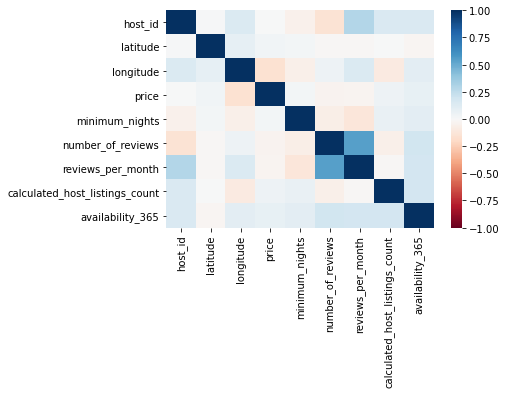

<IPython.core.display.Javascript object>

In [6]:
# Assumption 1: Multicollinearity
ryb = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["green", "yellow", "red"]
)
corr = df_sub.corr()
corr.style.set_precision(3).background_gradient(cmap="RdBu", vmin=-1, vmax=1)
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="RdBu")

In [7]:
#Assumption 2: Homoscedascity 


<IPython.core.display.Javascript object>

In [8]:
# OLS
# Loading in Data
data = pd.read_csv("../data/listings.csv")
display(data)

,Unnamed: 0,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,149,1,9,0.21,6,365,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,225,1,45,0.38,2,355,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,89,1,270,4.64,1,194,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,80,10,9,0.10,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,4,200,3,74,0.59,1,129,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38832,38832,129,1,1,1.00,1,147,0,0,1,...,0,0,0,0,0,0,0,0,1,0
38833,38833,45,1,1,1.00,6,339,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38834,38834,235,1,1,1.00,1,87,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38835,38835,100,1,2,2.00,1,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

In [9]:
# Since our data has already converted categorical features to dummy variables, we will drop those categorical columns
data.drop(
    ["Unnamed: 0",], axis=1, inplace=True,
)
display(data)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,9,0.21,6,365,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,225,1,45,0.38,2,355,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,89,1,270,4.64,1,194,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,80,10,9,0.10,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,200,3,74,0.59,1,129,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38832,129,1,1,1.00,1,147,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
38833,45,1,1,1.00,6,339,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
38834,235,1,1,1.00,1,87,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38835,100,1,2,2.00,1,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

Our new dataframe contains:   
38837 rows x 232 columns 


In [10]:
# Setting up variables to calculate the coefficients for an Ordinary Least Squares regression
Y = data["price"]
X = data.drop(["price"], axis=1)
display(X)

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,1,9,0.21,6,365,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,45,0.38,2,355,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,270,4.64,1,194,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,9,0.10,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3,74,0.59,1,129,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38832,1,1,1.00,1,147,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
38833,1,1,1.00,6,339,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
38834,1,1,1.00,1,87,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
38835,1,2,2.00,1,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

In [11]:
# Finding the beta coefficients
beta_hat = sp.linalg.inv(X.T @ X) @ X.T @ Y
beta_hat

0          -0.229640
1          -0.189034
2           0.263084
3          -0.103267
4           0.175848
           ...      
226   -140485.752930
227    -91695.322266
228     14664.050293
229     35895.931885
230     18746.757010
Length: 231, dtype: float64

<IPython.core.display.Javascript object>

In [12]:
# Lets take the coefficients and the names of our columns and put them into a dataframe
variables = X.columns.tolist()
model_coef = pd.DataFrame({"coef": beta_hat, "names": variables})
display(model_coef[model_coef["coef"] != 0].sort_values(by="coef", ascending=False))

,coef,names
96,2.696496e+06,neighbourhood_Graniteville
110,1.472697e+06,neighbourhood_Huguenot
99,1.413803e+06,neighbourhood_Great Kills
150,1.313905e+06,neighbourhood_New Dorp Beach
131,1.220623e+06,neighbourhood_Mariners Harbor
...,...,...
178,-1.848205e+06,neighbourhood_Rosebank
223,-1.850285e+06,neighbourhood_Willowbrook
37,-2.024948e+06,neighbourhood_Bull's Head
43,-2.801191e+06,neighbourhood_Castleton Corners


<IPython.core.display.Javascript object>

In [13]:
# Add in interpretation of results


<IPython.core.display.Javascript object>

In [14]:
# Now, we will use sci-kit learn to test the strength of our model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# First, we split the data into an 80:20 train:test ratio
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Create an object of Linear Regression class
LR = LinearRegression(fit_intercept=False)

# Fit the training data
LR.fit(x_train, y_train)

# Finding the beta coefficients
beta_hat_2 = sp.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train
display(np.array(beta_hat_2))

array([-1.97535022e-01, -1.83404694e-01,  3.50123111e-01, -7.37276372e-02,
        1.67868980e-01,  1.41831696e+02, -1.20385544e+02, -2.05644928e+02,
       -4.36902521e+03,  3.12266582e+04, -5.62478455e+02, -1.11582148e+04,
       -8.24395977e+04, -2.21525409e+03,  1.73162231e+01,  6.37866165e+02,
        4.49933441e+03,  1.30506348e+02, -6.65929016e+02,  4.76700659e+03,
        7.83988800e+02,  2.71610950e+03, -1.13867029e+03,  2.02526718e+02,
        9.95849854e+02, -1.95567603e+03, -3.72537735e+02,  6.41580292e+02,
        4.68364761e+02,  4.25859070e+02,  1.30145642e+03,  2.98036072e+03,
        6.76887939e+02, -1.31116624e+03,  3.83193665e+02, -1.13797577e+02,
       -5.75036224e+02, -7.87723926e+03,  2.44288361e+02,  1.42926584e+03,
       -7.53240967e+00, -7.45103882e+02,  6.64822327e+02,  5.51730586e+04,
        8.28011902e+02, -2.22090472e+03, -8.26319794e+02,  5.03079651e+02,
       -4.64242340e+02, -2.46423431e+02, -9.04960986e+03, -3.24282135e+02,
        1.41588385e+03,  

<IPython.core.display.Javascript object>

In [15]:
np.array(x_test) @ beta_hat_2

array([  298.91468805,   -71.08864506,   -72.45856179, ...,
         888.72540029,  1061.35172247, -2532.23332428])

<IPython.core.display.Javascript object>

In [16]:
# Predict Y using our X test data
y_prediction = LR.predict(x_test)

# Predict the accuracy score
score = r2_score(y_test, y_prediction)
print("The r2 score is", score)
print("The mean squared error is", mean_squared_error(y_test, y_prediction))
print(
    "The root mean squared error is", np.sqrt(mean_squared_error(y_test, y_prediction))
)
display(y_prediction)

The r2 score is 0.2062975329597737
The mean squared error is 23257.405127029026
The root mean squared error is 152.5037872547073


array([129.74967241, 177.89503765, 176.52511358, ..., 114.89804602,
       208.83919621, 185.20523596])

<IPython.core.display.Javascript object>